# MNIST 손글씨 - CNN v1
- 2 Conv2D layers
- 1 FCN layer
- 1 Output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 2023
np.random.seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# X data: 0 ~ 1 사이의 값으로 정규화 및 이미지 차원 변경(2차원 -> 3차원)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255. 
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

## 모델 정의/설정/학습/평가

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model = Sequential([ 
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 512)               18874880  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [8]:
model_path = 'best_model.h5'
mc = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=100, batch_size=200, 
                   callbacks=[mc, es])

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.1540 - accuracy: 0.9523
Epoch 1: val_loss improved from inf to 0.05818, saving model to best_model.h5
240/240 [==============================] - 14s 24ms/step - loss: 0.1540 - accuracy: 0.9523 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 2/100
238/240 [============================>.] - ETA: 0s - loss: 0.0350 - accuracy: 0.9889
Epoch 2: val_loss improved from 0.05818 to 0.04526, saving model to best_model.h5
240/240 [==============================] - 5s 21ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0453 - val_accuracy: 0.9867
Epoch 3/100
238/240 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9951
Epoch 3: val_loss did not improve from 0.04526
240/240 [==============================] - 5s 20ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0578 - val_accuracy: 0.9831
Epoch 4/100
238/240 [============================>.] - ETA: 0s - loss: 0.0112 - accuracy: 0.9963
Epoch 4:

In [9]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9868


[0.03981805965304375, 0.9868000149726868]

- 시각화

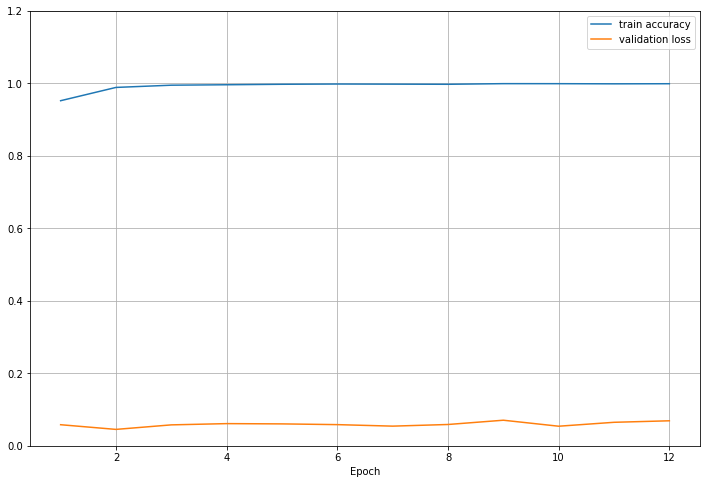

In [10]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()